In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import sent_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
#from numpy import image
from PIL import Image

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

from nltk.stem import WordNetLemmatizer
from nltk.stem import RegexpStemmer
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=MultinomialNB()
b=BernoulliNB()

from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [2]:
df=pd.read_csv('restaurant.csv')
df

Unnamed: 0               review_id                 user_id  \
0         2370338  _WTGv5XnA-qb_XD1D7Z0jg  6PgdGb3HrZdsfl2GiULo8w   
1         2370357  JlNnsvMPLK_1-X2hwzK24w  IS9yw8P2uAPBX6FNLLX4KA   
2         2370373  hBkoWffORRb6aqKhC_Li2A  uZdFsE_aHbFBChgN6Xa8tw   
3         2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
4         2370500  5tw_pedoHVi9bgeiBNsISg  E0sm4Ve7ifanFYeQMcV8Eg   
...           ...                     ...                     ...   
10412     3220114  46xWDTFPZI9u6waHm78EKw  CT57mpNepL9q9sTYFqRbLQ   
10413     3220152  gbBau-2wy3_kNr2y6dEa1Q  c-j3TV1F8rI6bQUD6nqGPQ   
10414     3220255  2wFmrsm8j1cyyG-DoMqKUw  kbylx63ynkXL8YBJzVfNnQ   
10415     3220306  75nzyA96_BgVrpflweAA3w  6rEG-G4syq5IvWti4tyPXA   
10416     3220316  mMa_YQNBJfuh_Nw_x81jlw  GsALS1y9wJoBRJTEzJiISg   

                  business_id  stars  useful  funny  cool  \
0      RESDUcs7fIiihp38-d6_6g      5       0      1     0   
1      RESDUcs7fIiihp38-d6_6g      4      39     21    29   
2      RESDUcs7fIiihp38-d6_6g      4       1      1     1   
3      RESDUcs7fIiihp38-d6_6g      1       0      0     0   
4      RESDUcs7fIiihp38-d6_6g      5       0      0     0   
...                       ...    ...     ...    ...   ...   
10412  RESDUcs7fIiihp38-d6_6g      5       0      0     0   
10413  RESDUcs7fIiihp38-d6_6g      4       3      0     3   
10414  RESDUcs7fIiihp38-d6_6g      5       0      0     0   
10415  RESDUcs7fIiihp38-d6_6g      4       1      1     2   
10416  RESDUcs7fIiihp38-d6_6g      4       1      1     1   

                                                    text                 date  
0      After getting food poisoning at the Palms hote...  2012-12-04 03:10:18  
1      "A feast worthy of Gods"\n\nBaccarnal Buffet i...  2014-01-17 00:50:50  
2      The crab legs are better than the ones at Wick...  2015-06-08 18:03:09  
3      Not worth it! Too salty food and expensive! Th...  2016-12-19 16:15:29  
4      I would give this infinite stars if I could. M...  2015-07-28 07:13:17  
...                                                  ...                  ...  
10412  Best buffet ever! Irma was great, served us be...  2019-11-17 20:39:36  
10413  Hollllllyyyy moleyyyy! \n\nThis buffet was one...  2019-11-12 02:23:07  
10414  The selection is amazing and all the food is e...  2019-12-12 03:27:22  
10415  One of the best buffets I've had in Vegas. My ...  2019-11-01 21:00:51  
10416  I got a chance to go to the Bacchanal Buffett ...  2019-11-30 22:36:56  

[10417 rows x 10 columns]

## Data Analysis

In [3]:
df.stars.unique()

array([5, 4, 1, 3, 2], dtype=int64)

In [4]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

Text(0.5, 1.0, 'Yıldızların Dağılım Grafiği')

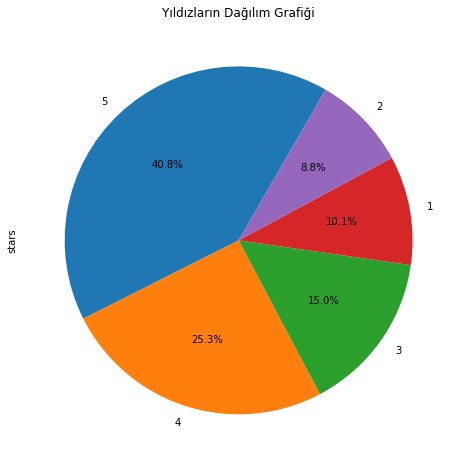

In [5]:
plt.figure(figsize=(8,8))
#explode=(0.4,0.05,0.05) #en büyük pastanın dilimleri birbirinden ayırıyor
df['stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Yıldızların Dağılım Grafiği')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

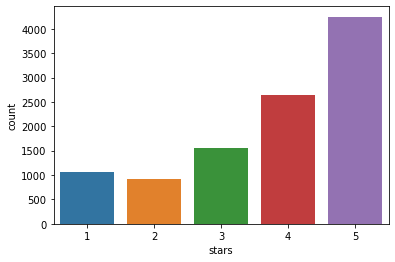

In [6]:
sns.countplot(df['stars'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


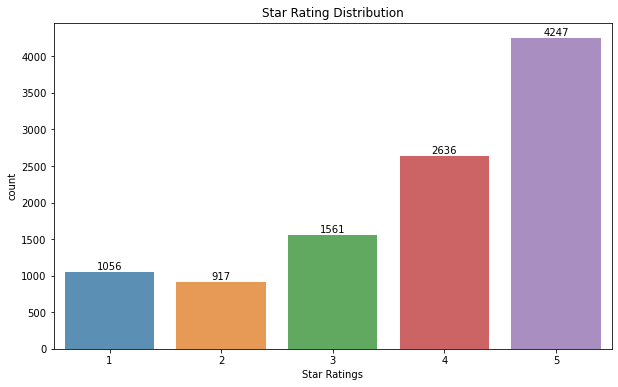

In [7]:
x=df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [8]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['year']
df['month'] = pd.DatetimeIndex(df['date']).month
df['month']

0        12
1         1
2         6
3        12
4         7
         ..
10412    11
10413    11
10414    12
10415    11
10416    11
Name: month, Length: 10417, dtype: int64

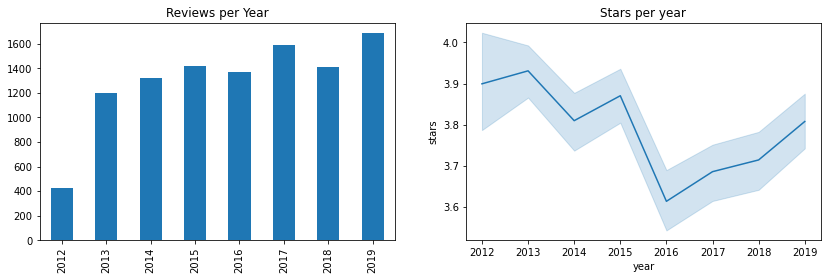

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
df.year.value_counts().sort_index().plot.bar(title='Reviews per Year', ax=axes[0]);
sns.lineplot(x='year', y='stars', data=df, ax=axes[1])
axes[1].set_title('Stars per year');

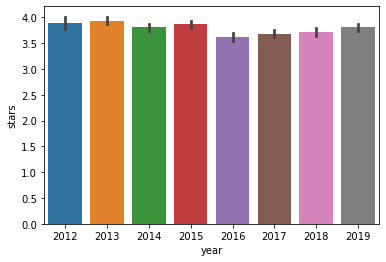

In [10]:
sns.barplot(x=df.year , y=df.stars);

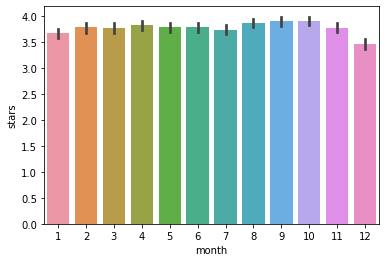

In [11]:
sns.barplot(x=df.month , y=df.stars);

In [12]:
stars=pd.DataFrame(df['stars'].value_counts(normalize=True).round(decimals=2))
stars

stars
5   0.41
4   0.25
3   0.15
1   0.10
2   0.09

df['sentiment']=np.where(df.stars==3,'neutral')

In [13]:
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive' 

In [14]:
df

Unnamed: 0               review_id                 user_id  \
0         2370338  _WTGv5XnA-qb_XD1D7Z0jg  6PgdGb3HrZdsfl2GiULo8w   
1         2370357  JlNnsvMPLK_1-X2hwzK24w  IS9yw8P2uAPBX6FNLLX4KA   
2         2370373  hBkoWffORRb6aqKhC_Li2A  uZdFsE_aHbFBChgN6Xa8tw   
3         2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
4         2370500  5tw_pedoHVi9bgeiBNsISg  E0sm4Ve7ifanFYeQMcV8Eg   
...           ...                     ...                     ...   
10412     3220114  46xWDTFPZI9u6waHm78EKw  CT57mpNepL9q9sTYFqRbLQ   
10413     3220152  gbBau-2wy3_kNr2y6dEa1Q  c-j3TV1F8rI6bQUD6nqGPQ   
10414     3220255  2wFmrsm8j1cyyG-DoMqKUw  kbylx63ynkXL8YBJzVfNnQ   
10415     3220306  75nzyA96_BgVrpflweAA3w  6rEG-G4syq5IvWti4tyPXA   
10416     3220316  mMa_YQNBJfuh_Nw_x81jlw  GsALS1y9wJoBRJTEzJiISg   

                  business_id  stars  useful  funny  cool  \
0      RESDUcs7fIiihp38-d6_6g      5       0      1     0   
1      RESDUcs7fIiihp38-d6_6g      4      39     21    29   
2      RESDUcs7fIiihp38-d6_6g      4       1      1     1   
3      RESDUcs7fIiihp38-d6_6g      1       0      0     0   
4      RESDUcs7fIiihp38-d6_6g      5       0      0     0   
...                       ...    ...     ...    ...   ...   
10412  RESDUcs7fIiihp38-d6_6g      5       0      0     0   
10413  RESDUcs7fIiihp38-d6_6g      4       3      0     3   
10414  RESDUcs7fIiihp38-d6_6g      5       0      0     0   
10415  RESDUcs7fIiihp38-d6_6g      4       1      1     2   
10416  RESDUcs7fIiihp38-d6_6g      4       1      1     1   

                                                    text                 date  \
0      After getting food poisoning at the Palms hote...  2012-12-04 03:10:18   
1      "A feast worthy of Gods"\n\nBaccarnal Buffet i...  2014-01-17 00:50:50   
2      The crab legs are better than the ones at Wick...  2015-06-08 18:03:09   
3      Not worth it! Too salty food and expensive! Th...  2016-12-19 16:15:29   
4      I would give this infinite stars if I could. M...  2015-07-28 07:13:17   
...                                                  ...                  ...   
10412  Best buffet ever! Irma was great, served us be...  2019-11-17 20:39:36   
10413  Hollllllyyyy moleyyyy! \n\nThis buffet was one...  2019-11-12 02:23:07   
10414  The selection is amazing and all the food is e...  2019-12-12 03:27:22   
10415  One of the best buffets I've had in Vegas. My ...  2019-11-01 21:00:51   
10416  I got a chance to go to the Bacchanal Buffett ...  2019-11-30 22:36:56   

       year  month sentiment  
0      2012     12  positive  
1      2014      1  positive  
2      2015      6  positive  
3      2016     12  negative  
4      2015      7  positive  
...     ...    ...       ...  
10412  2019     11  positive  
10413  2019     11  positive  
10414  2019     12  positive  
10415  2019     11  positive  
10416  2019     11  positive  

[10417 rows x 13 columns]

## Language Detection

In [15]:
new_df= df[['stars', 'sentiment','text']]

In [16]:
new_df

stars sentiment                                               text
0          5  positive  After getting food poisoning at the Palms hote...
1          4  positive  "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2          4  positive  The crab legs are better than the ones at Wick...
3          1  negative  Not worth it! Too salty food and expensive! Th...
4          5  positive  I would give this infinite stars if I could. M...
...      ...       ...                                                ...
10412      5  positive  Best buffet ever! Irma was great, served us be...
10413      4  positive  Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414      5  positive  The selection is amazing and all the food is e...
10415      4  positive  One of the best buffets I've had in Vegas. My ...
10416      4  positive  I got a chance to go to the Bacchanal Buffett ...

[10417 rows x 3 columns]

In [17]:
from langdetect import detect
#detectyelp['text'].apply(detect)

In [18]:
nonen=new_df[new_df['text'].apply(detect)!='en']
nonen

stars sentiment                                               text
195        1  negative  真心不怎么样 中午没有雪蟹腿\n菜都很一般\n港式点心说的过去其他的中式菜只能说尚且入口\n...
464        5  positive  Die Auswahl ist gigantisch. Es gibt verschiede...
806        4  positive  Wait wait wait wait wait wait wait....pay....w...
864        3   neutral  談到位於賭城的自助餐，十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 Caesa...
1370       3   neutral  没有做好功课，千辛万苦找到才发现CES期间的晚餐要近60刀，都想打退堂鼓了。\n\n其实拉斯...
1548       5  positive  高いけど メチャ美味しいし 品揃えも豊富で お料理一品一品の見た目もとても綺麗です。 特に茹...
1962       2  negative  食物真的很差。要排隊三個小時。以他的聲譽來說每位500元的價錢不算貴。不過進到去真是大吃一驚...
1994       5  positive  Suite à sa rénovation, le buffet du Caesar Pal...
2098       4  positive  Dommage que les cocktails ne soient pas inclus...
2185       2  negative  完全無法理解這間被推薦的原因到底為何...\n\n\n相當 相當 相當 普通的一間把費\n\...
2559       5  positive  Den mest SINDSSYGE buffet jeg nogensinde har s...
2705       5  positive  Das beste Buffet in Las Vegas - und ich habe a...
3419       5  positive  De las 3 veces que he estado en las vegas, he ...
3628       5  positive  凯撒宫的自助餐，怎么可以这么棒！帝王蟹生蚝虾蟹鲜美无比，羊排叉烧披萨提拉米苏布丁每一样都想说...
4113       1  negative  慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢啊！啊，（ー...
4195       5  positive  Excelente comida únicamente una larga espera p...
4842       4  positive  空間明亮 ，prime rib很好吃 ，甜點種類很多 ，也都好吃。但是中式方面種類比較少，但...
4933       5  positive  Buffet-Restaurants haben fast alle Hotels in L...
5809       3   neutral  Super Auswahl, mega Groß, schönes Ambiete.\nAB...
6798       4  positive  Comida muito boa, recepção boa. Só não recomen...
6972       5  positive  Ayant déjà fait l'expérience de plusieurs buff...
7226       2  negative  料理の種類は多いけど、料理それぞれがやや雑な印象。カニは殻が割り切れてなく食べにくい。肉は焼...
7396       5  positive  Mega godt og mega stort. \n\nLækker mad selvom...
7776       4  positive  Vckujmxg pinhole ijni cuv u  kk joyvm mjgcjhnn...
8474       5  positive  Una excelente opción para comer rico variado y...
8489       5  positive  Muy bueno el lugar de la Vegas buena comida mu...
8492       1  negative  Demasiado alto el precio fueron $141 por 2 per...
9151       3   neutral  其实还好，没有评价说的那么好 毕竟他只是一家buffet 餐厅！首先值得点赞的是他的品种很多...
9254       1  negative  食物还可以，但吃饭要排很久的队。而且歧视中国人，吃饭还要出示护照。\n不是很好找，在凯撒一楼...
9337       5  positive  La comida riqisima EMMA  nos atendio exlente a...
9645       5  positive  ラスベガスに行ったらバッフェに！\n少しお値段高めですが、こちらは種類の多さ、美味しさ、どれ...
9738       5  positive  Excelente comida,muy fresca y bien elaborada,p...
9799       4  positive  ラスベガスで一番美味しいと言われている\nバフェです。ランチで行ってきました。\n種類が本当...
9938       5  positive  Super recomendado todos muy amables desde la e...
10043      5  positive  I never fail to go this place when I go to Veg...
10044      2  negative  ビュッフェスタイルのレストラン、夜に20～30分ほど並んでの入店です。\n\n店内は非常に広...
10062      5  positive  Simplemente espectacular y la atención muy bue...
10064      5  positive  Muy buen servicio y todo la comida esta muy bu...
10127      4  positive  很多种类的选择，有海鲜，甜点，和各国的美食，就是现在价格变贵了，周日54美元一位，价格还是不...
10284      4  positive  這是我第一次到這個餐廳吃飯，因為它在Yelp的評分很高，所以我想去試試，果然是一家好餐廳，雖...
10318      4  positive  Excellent buffet mais beaucoup d'attente..beau...
10334      4  positive  種類豊富で美味しいと聞き来店。\nストローラー(バギー)も一緒に入れてもらえて助かりました。...
10336      5  positive  The best buffet in Vegas\n\nラスベガスで1番美味しいバッフェだと...
10366      1  negative  看了网上的广告去的，非常失望，菜色没有那么丰富，大部分菜品颜色暗沉，给人感觉不新鲜，最想吃的...

In [19]:
nonen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 195 to 10366
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   stars      44 non-null     int64 
 1   sentiment  44 non-null     object
 2   text       44 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [20]:
yelp=new_df[new_df['text'].apply(detect)=='en']

In [21]:
yelp

stars sentiment                                               text
0          5  positive  After getting food poisoning at the Palms hote...
1          4  positive  "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2          4  positive  The crab legs are better than the ones at Wick...
3          1  negative  Not worth it! Too salty food and expensive! Th...
4          5  positive  I would give this infinite stars if I could. M...
...      ...       ...                                                ...
10412      5  positive  Best buffet ever! Irma was great, served us be...
10413      4  positive  Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414      5  positive  The selection is amazing and all the food is e...
10415      4  positive  One of the best buffets I've had in Vegas. My ...
10416      4  positive  I got a chance to go to the Bacchanal Buffett ...

[10374 rows x 3 columns]

## Removing Characters 

In [22]:
yelp['text']=yelp['text'].str.lower()

<ipython-input-22-53b1851f357c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.lower()


In [23]:
yelp['text']=yelp['text'].str.replace('[^\w\s]','')

<ipython-input-23-e5b7218c349c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('[^\w\s]','')


In [24]:
yelp['text']=yelp['text'].str.replace('\d+','') #removing numerals 

<ipython-input-24-9a45eb085225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('\d+','') #removing numerals


In [25]:
yelp['text']=yelp['text'].str.replace('\n',' ').str.replace('\r','')

<ipython-input-25-969320066639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('\n',' ').str.replace('\r','')


In [26]:
yelp

stars sentiment                                               text
0          5  positive  after getting food poisoning at the palms hote...
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...
2          4  positive  the crab legs are better than the ones at wick...
3          1  negative  not worth it too salty food and expensive this...
4          5  positive  i would give this infinite stars if i could my...
...      ...       ...                                                ...
10412      5  positive  best buffet ever irma was great served us bett...
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...
10414      5  positive  the selection is amazing and all the food is e...
10415      4  positive  one of the best buffets ive had in vegas my on...
10416      4  positive  i got a chance to go to the bacchanal buffett ...

[10374 rows x 3 columns]

stemmerregexp=RegexpStemmer('ing')
stemmerregexp.stem(df['text'])

In [27]:
#df['text'] = df['text'].apply(lambda x: [stemmerregexp.stem(y) for y in x]) 

## Polarity-Subjectivity

In [28]:
yelp['text']

0        after getting food poisoning at the palms hote...
1        a feast worthy of gods  baccarnal buffet in ca...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could my...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy   this buffet was one fo...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10374, dtype: object

sample_reviews = yelp[['stars','text']].sample(10000)
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity


sample_reviews.text

sample_reviews['polarity'] = sample_reviews.text.apply(TextBlob(yelp['text']).sentiment.polarity)
sample_reviews.head()

In [29]:
yelp['polarity'] = yelp['text'].apply(lambda tweet: TextBlob(tweet).sentiment)


<ipython-input-29-971c7f8e6cd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['polarity'] = yelp['text'].apply(lambda tweet: TextBlob(tweet).sentiment)


In [30]:
yelp

stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
3          1  negative  not worth it too salty food and expensive this...   
4          5  positive  i would give this infinite stars if i could my...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

                                         polarity  
0       (0.36745179063360883, 0.6057024793388429)  
1       (0.21940880721220526, 0.5372919556171983)  
2      (-0.13472222222222224, 0.7319444444444446)  
3                   (-0.325, 0.39999999999999997)  
4                                 (0.3625, 0.725)  
...                                           ...  
10412                          (0.54375, 0.48125)  
10413   (0.21010101010101012, 0.5868686868686869)  
10414                  (0.4800000000000001, 0.63)  
10415    (0.1851851851851852, 0.5333333333333333)  
10416               (0.3125, 0.43583333333333335)  

[10374 rows x 4 columns]

In [31]:
sentiment_series = yelp['polarity'].tolist()
#column=['polaarity', 'subjectivity']
yelp[['polaarity', 'subjectivity']] = pd.DataFrame(sentiment_series,index=yelp.index)
yelp.drop('polarity', inplace=True, axis=1)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
sample_reviews = yelp[['stars', 'text']].sample(10000)
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
sample_reviews['polarity'] = sample_reviews.text.apply(detect_polarity)
sample_reviews.head()

stars                                               text  polarity
10010      5  this is my nd review my first was for dinner t...  0.213304
4863       1  for what you pay for it should be safe to assu... -0.054832
9654       4  we had the opportunity to visit this buffet on...  0.351000
7281       5  there is a reason that this is the most expens...  0.125000
6173       5  this is pretty darn close to what my dream buf...  0.294314

In [33]:
yelp

stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
3          1  negative  not worth it too salty food and expensive this...   
4          5  positive  i would give this infinite stars if i could my...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

       polaarity  subjectivity  
0       0.367452      0.605702  
1       0.219409      0.537292  
2      -0.134722      0.731944  
3      -0.325000      0.400000  
4       0.362500      0.725000  
...          ...           ...  
10412   0.543750      0.481250  
10413   0.210101      0.586869  
10414   0.480000      0.630000  
10415   0.185185      0.533333  
10416   0.312500      0.435833  

[10374 rows x 5 columns]

## Word Cloud

In [34]:
from wordcloud import WordCloud

wc = WordCloud( background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [35]:
text_5_star=yelp[yelp['stars']>3]
text_5_star

stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
4          5  positive  i would give this infinite stars if i could my...   
5          5  positive  really enjoyed everything they had to offer it...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

       polaarity  subjectivity  
0       0.367452      0.605702  
1       0.219409      0.537292  
2      -0.134722      0.731944  
4       0.362500      0.725000  
5       0.173206      0.333218  
...          ...           ...  
10412   0.543750      0.481250  
10413   0.210101      0.586869  
10414   0.480000      0.630000  
10415   0.185185      0.533333  
10416   0.312500      0.435833  

[6853 rows x 5 columns]

In [36]:
text_1_star=yelp[yelp['stars']<3]
text_1_star

stars sentiment                                               text  \
3          1  negative  not worth it too salty food and expensive this...   
12         1  negative  food is fine better than most buffets  when i ...   
29         2  negative  so i come here on my birthday thinking its the...   
33         1  negative  be careful using the restroom here while i was...   
42         2  negative  what a money pit food was terrible and not lab...   
...      ...       ...                                                ...   
10390      1  negative  i  have eaten here for the breakfast and lunch...   
10394      1  negative  in thanksgiving day i stayed in line for three...   
10401      2  negative  i went to the wicked spoon at cosmopolitan and...   
10402      2  negative  i am one disappointed buffetloving foodie   we...   
10410      1  negative  came him from la thanksgiving week we decided ...   

       polaarity  subjectivity  
3      -0.325000      0.400000  
12      0.227489      0.403247  
29      0.148839      0.477817  
33     -0.001389      0.443750  
42     -1.000000      1.000000  
...          ...           ...  
10390   0.023283      0.653030  
10394   0.116667      0.666667  
10401   0.007900      0.476732  
10402   0.080144      0.544444  
10410  -0.189815      0.613889  

[1964 rows x 5 columns]

In [37]:
text_5_star_review = " ".join(review for review in text_5_star.text)
text_5_star_review

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we ate  the seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it though  the prime rib was the best ive ever had  i loved the sweet potato tots  i even have pho  the music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightful  i will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner a feast worthy of gods  baccarnal buffet in caesar palace is consider the best buffet in t

In [38]:
text_1_star_review = " ".join(review for review in text_1_star.text)
text_1_star_review

'not worth it too salty food and expensive this is our furst and kast visit on this buffet food is fine better than most buffets  when i read about the wait i doubted it they were right   minutes minimum  food aint that good one line after another for overpriced food  dont waste the cash on buffet of buffets pass that many lines and cost isnt worth it  bacchanal is slow  old hostess was rude too pricey so i come here on my birthday thinking its the best buffet in town a little pricey for me  but its not well the food was good the false advertisement took me by surprise i called the buffet around  pm to make sure they had snow king and stone crab and the buffet said they sure did for  per person i thought that was great so decided to try side note ive been going to the bellagio buffet for  mon  thurs  get a king and snow crab they have it complete separated ok now back to bacchanal buffet i ask the chef at the crab station where the stone crab was and he looked at me like i was crazy he

 Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [40, 15]

full_names = ['polaarity', 'subjectivity']

#for index, comedian in enumerate(yelp.columns):
wc.generate(text_5_star_review)
    
plt.subplot(3, 4, index+1)
plt.imshow(wc)
plt.axis("off")
plt.title('5 Star Review')
    
plt.show()

wc.generate(text_1_star_review)
    
plt.subplot(3, 4, index+1)
plt.imshow(wc)
plt.axis("off")
plt.title('1 Star Review')
    
plt.show()

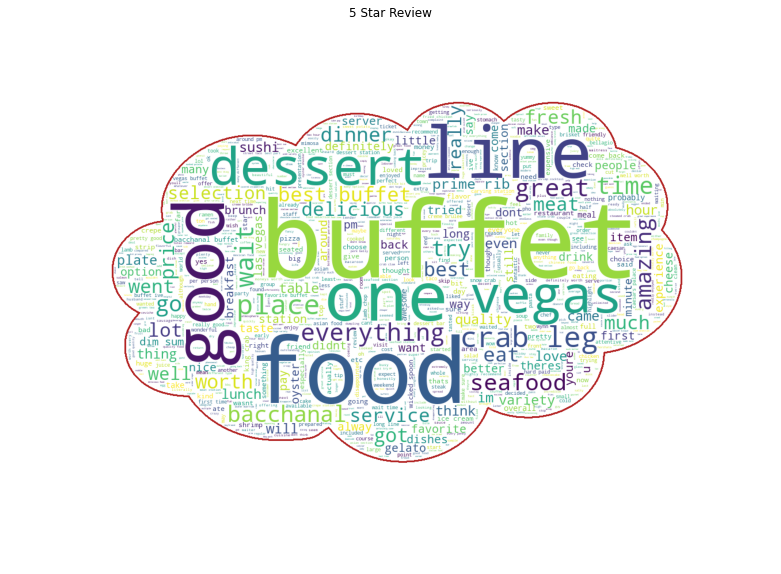

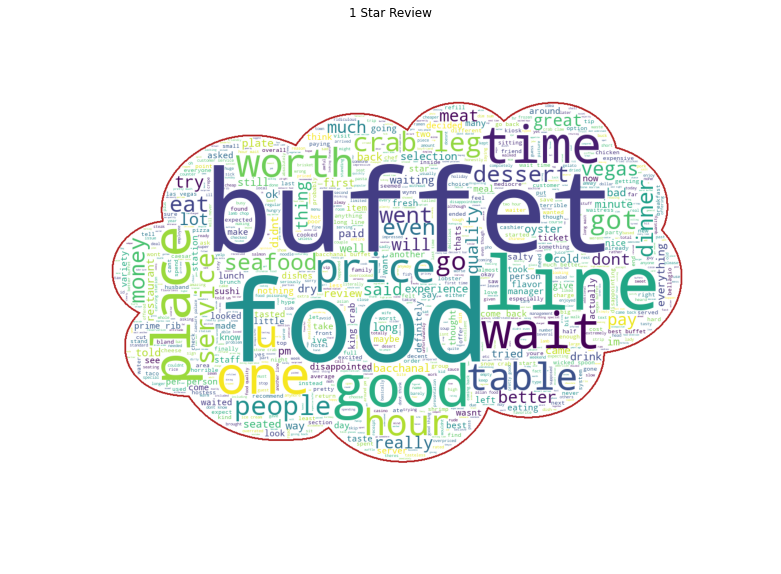

In [39]:
wine_mask = np.array(Image.open("cloud.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=wine_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text_5_star_review)

# store to file
wc.to_file("cloud2.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('5 Star Review')
plt.show()


# Generate a wordcloud
wc.generate(text_1_star_review)

# store to file
wc.to_file("cloud3.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis("off")
plt.title('1 Star Review')
plt.show()

## Classification

In [40]:
yelp['text']=yelp['text'].str.replace('[^a-zA-Z]',' ')

<ipython-input-40-140d9e6642b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('[^a-zA-Z]',' ')


In [41]:
yelp['clean_text'] = yelp['text'].apply(lambda x: nltk.word_tokenize(x) ) 
yelp

<ipython-input-41-e361a252be8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['clean_text'] = yelp['text'].apply(lambda x: nltk.word_tokenize(x) )


stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
3          1  negative  not worth it too salty food and expensive this...   
4          5  positive  i would give this infinite stars if i could my...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

       polaarity  subjectivity  \
0       0.367452      0.605702   
1       0.219409      0.537292   
2      -0.134722      0.731944   
3      -0.325000      0.400000   
4       0.362500      0.725000   
...          ...           ...   
10412   0.543750      0.481250   
10413   0.210101      0.586869   
10414   0.480000      0.630000   
10415   0.185185      0.533333   
10416   0.312500      0.435833   

                                              clean_text  
0      [after, getting, food, poisoning, at, the, pal...  
1      [a, feast, worthy, of, gods, baccarnal, buffet...  
2      [the, crab, legs, are, better, than, the, ones...  
3      [not, worth, it, too, salty, food, and, expens...  
4      [i, would, give, this, infinite, stars, if, i,...  
...                                                  ...  
10412  [best, buffet, ever, irma, was, great, served,...  
10413  [hollllllyyyy, moleyyyy, this, buffet, was, on...  
10414  [the, selection, is, amazing, and, all, the, f...  
10415  [one, of, the, best, buffets, ive, had, in, ve...  
10416  [i, got, a, chance, to, go, to, the, bacchanal...  

[10374 rows x 6 columns]

In [42]:
from nltk.stem import PorterStemmer
stemmerporter=PorterStemmer()
import nltk
from nltk.stem import WordNetLemmatizer
lemmetizer_output= WordNetLemmatizer()
  
yelp['stem_text'] = yelp['clean_text'].apply(lambda x: [lemmetizer_output.lemmatize(j) for j in x if not j in set(STOP_WORDS)] )
yelp

<ipython-input-42-64c82313e87f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['stem_text'] = yelp['clean_text'].apply(lambda x: [lemmetizer_output.lemmatize(j) for j in x if not j in set(STOP_WORDS)] )


stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
3          1  negative  not worth it too salty food and expensive this...   
4          5  positive  i would give this infinite stars if i could my...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

       polaarity  subjectivity  \
0       0.367452      0.605702   
1       0.219409      0.537292   
2      -0.134722      0.731944   
3      -0.325000      0.400000   
4       0.362500      0.725000   
...          ...           ...   
10412   0.543750      0.481250   
10413   0.210101      0.586869   
10414   0.480000      0.630000   
10415   0.185185      0.533333   
10416   0.312500      0.435833   

                                              clean_text  \
0      [after, getting, food, poisoning, at, the, pal...   
1      [a, feast, worthy, of, gods, baccarnal, buffet...   
2      [the, crab, legs, are, better, than, the, ones...   
3      [not, worth, it, too, salty, food, and, expens...   
4      [i, would, give, this, infinite, stars, if, i,...   
...                                                  ...   
10412  [best, buffet, ever, irma, was, great, served,...   
10413  [hollllllyyyy, moleyyyy, this, buffet, was, on...   
10414  [the, selection, is, amazing, and, all, the, f...   
10415  [one, of, the, best, buffets, ive, had, in, ve...   
10416  [i, got, a, chance, to, go, to, the, bacchanal...   

                                               stem_text  
0      [getting, food, poisoning, palm, hotel, scared...  
1      [feast, worthy, god, baccarnal, buffet, caesar...  
2      [crab, leg, better, one, wicked, spoon, huge, ...  
3      [worth, salty, food, expensive, furst, kast, v...  
4      [infinite, star, family, diamond, card, caesar...  
...                                                  ...  
10412  [best, buffet, irma, great, served, better, pl...  
10413  [hollllllyyyy, moleyyyy, buffet, book, iv, see...  
10414  [selection, amazing, food, excellently, prepar...  
10415  [best, buffet, ive, vega, visit, unfortunately...  
10416  [got, chance, bacchanal, buffett, tuesday, cae...  

[10374 rows x 7 columns]

In [43]:
yelp['cleaned_text'] = yelp['stem_text'].apply(lambda x: ' '.join(x) )
yelp

<ipython-input-43-22884faf53b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['cleaned_text'] = yelp['stem_text'].apply(lambda x: ' '.join(x) )


stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
3          1  negative  not worth it too salty food and expensive this...   
4          5  positive  i would give this infinite stars if i could my...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

       polaarity  subjectivity  \
0       0.367452      0.605702   
1       0.219409      0.537292   
2      -0.134722      0.731944   
3      -0.325000      0.400000   
4       0.362500      0.725000   
...          ...           ...   
10412   0.543750      0.481250   
10413   0.210101      0.586869   
10414   0.480000      0.630000   
10415   0.185185      0.533333   
10416   0.312500      0.435833   

                                              clean_text  \
0      [after, getting, food, poisoning, at, the, pal...   
1      [a, feast, worthy, of, gods, baccarnal, buffet...   
2      [the, crab, legs, are, better, than, the, ones...   
3      [not, worth, it, too, salty, food, and, expens...   
4      [i, would, give, this, infinite, stars, if, i,...   
...                                                  ...   
10412  [best, buffet, ever, irma, was, great, served,...   
10413  [hollllllyyyy, moleyyyy, this, buffet, was, on...   
10414  [the, selection, is, amazing, and, all, the, f...   
10415  [one, of, the, best, buffets, ive, had, in, ve...   
10416  [i, got, a, chance, to, go, to, the, bacchanal...   

                                               stem_text  \
0      [getting, food, poisoning, palm, hotel, scared...   
1      [feast, worthy, god, baccarnal, buffet, caesar...   
2      [crab, leg, better, one, wicked, spoon, huge, ...   
3      [worth, salty, food, expensive, furst, kast, v...   
4      [infinite, star, family, diamond, card, caesar...   
...                                                  ...   
10412  [best, buffet, irma, great, served, better, pl...   
10413  [hollllllyyyy, moleyyyy, buffet, book, iv, see...   
10414  [selection, amazing, food, excellently, prepar...   
10415  [best, buffet, ive, vega, visit, unfortunately...   
10416  [got, chance, bacchanal, buffett, tuesday, cae...   

                                            cleaned_text  
0      getting food poisoning palm hotel scared eat b...  
1      feast worthy god baccarnal buffet caesar palac...  
2      crab leg better one wicked spoon huge prawn sh...  
3      worth salty food expensive furst kast visit bu...  
4      infinite star family diamond card caesar palac...  
...                                                  ...  
10412    best buffet irma great served better place vega  
10413  hollllllyyyy moleyyyy buffet book iv seen buff...  
10414  selection amazing food excellently prepared es...  
10415  best buffet ive vega visit unfortunately marre...  
10416  got chance bacchanal buffett tuesday caesar pa...  

[10374 rows x 8 columns]

In [44]:
#from autocorrect import spell
#yelp['blob_text'] = yelp['stem_text'].apply(lambda x: TextBlob(x).correct() )

In [45]:
yelp

stars sentiment                                               text  \
0          5  positive  after getting food poisoning at the palms hote...   
1          4  positive  a feast worthy of gods  baccarnal buffet in ca...   
2          4  positive  the crab legs are better than the ones at wick...   
3          1  negative  not worth it too salty food and expensive this...   
4          5  positive  i would give this infinite stars if i could my...   
...      ...       ...                                                ...   
10412      5  positive  best buffet ever irma was great served us bett...   
10413      4  positive  hollllllyyyy moleyyyy   this buffet was one fo...   
10414      5  positive  the selection is amazing and all the food is e...   
10415      4  positive  one of the best buffets ive had in vegas my on...   
10416      4  positive  i got a chance to go to the bacchanal buffett ...   

       polaarity  subjectivity  \
0       0.367452      0.605702   
1       0.219409      0.537292   
2      -0.134722      0.731944   
3      -0.325000      0.400000   
4       0.362500      0.725000   
...          ...           ...   
10412   0.543750      0.481250   
10413   0.210101      0.586869   
10414   0.480000      0.630000   
10415   0.185185      0.533333   
10416   0.312500      0.435833   

                                              clean_text  \
0      [after, getting, food, poisoning, at, the, pal...   
1      [a, feast, worthy, of, gods, baccarnal, buffet...   
2      [the, crab, legs, are, better, than, the, ones...   
3      [not, worth, it, too, salty, food, and, expens...   
4      [i, would, give, this, infinite, stars, if, i,...   
...                                                  ...   
10412  [best, buffet, ever, irma, was, great, served,...   
10413  [hollllllyyyy, moleyyyy, this, buffet, was, on...   
10414  [the, selection, is, amazing, and, all, the, f...   
10415  [one, of, the, best, buffets, ive, had, in, ve...   
10416  [i, got, a, chance, to, go, to, the, bacchanal...   

                                               stem_text  \
0      [getting, food, poisoning, palm, hotel, scared...   
1      [feast, worthy, god, baccarnal, buffet, caesar...   
2      [crab, leg, better, one, wicked, spoon, huge, ...   
3      [worth, salty, food, expensive, furst, kast, v...   
4      [infinite, star, family, diamond, card, caesar...   
...                                                  ...   
10412  [best, buffet, irma, great, served, better, pl...   
10413  [hollllllyyyy, moleyyyy, buffet, book, iv, see...   
10414  [selection, amazing, food, excellently, prepar...   
10415  [best, buffet, ive, vega, visit, unfortunately...   
10416  [got, chance, bacchanal, buffett, tuesday, cae...   

                                            cleaned_text  
0      getting food poisoning palm hotel scared eat b...  
1      feast worthy god baccarnal buffet caesar palac...  
2      crab leg better one wicked spoon huge prawn sh...  
3      worth salty food expensive furst kast visit bu...  
4      infinite star family diamond card caesar palac...  
...                                                  ...  
10412    best buffet irma great served better place vega  
10413  hollllllyyyy moleyyyy buffet book iv seen buff...  
10414  selection amazing food excellently prepared es...  
10415  best buffet ive vega visit unfortunately marre...  
10416  got chance bacchanal buffett tuesday caesar pa...  

[10374 rows x 8 columns]

In [46]:
x=yelp.cleaned_text #text sütunu x oluyor
y=yelp.sentiment #dataframein stars sütunu y oluyor 

print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

(10374,)


In [47]:
x_train

8234    start flew california havent ate day pm time g...
8183    bacchanal buffet craziest buffet ive food sele...
5116    best crab leg meat selection cheese etc buffet...
8047    ok far best buffet ive im huge fan buffet bacc...
9614    ummm day cheaper basically eat surf turf asian...
                              ...                        
5752    best buffet value gotten came lunch paid good ...
5209    bacchanal favorite vega buffet luxurious expan...
5408    thought wynn buffet great came bacchanal buffe...
863     omg place amazing variety choose super delicio...
7292    favorite buffet la vega expensive quality good...
Name: cleaned_text, Length: 7261, dtype: object

In [48]:
vect = CountVectorizer(lowercase=True, stop_words='english')
x_train_dtm= vect.fit_transform(x_train) #yazıyı alıp vektöre çeviriyor.
#yazıyı textten vektöre tarnsfrom ettiğimiz için fit_transform kullanıyoruz
print(x_train_dtm)

x_test_dtm=vect.transform(x_test)


  (0, 14101)	1
  (0, 5584)	1
  (0, 2084)	1
  (0, 6752)	1
  (0, 797)	1
  (0, 3646)	1
  (0, 11184)	1
  (0, 15157)	1
  (0, 6348)	1
  (0, 14474)	1
  (0, 14111)	1
  (0, 10018)	1
  (0, 1834)	3
  (0, 16266)	1
  (0, 15489)	2
  (0, 11943)	1
  (0, 6430)	1
  (0, 15056)	1
  (0, 2868)	1
  (0, 8426)	1
  (0, 16671)	1
  (0, 5652)	1
  (0, 10443)	1
  (0, 13061)	1
  (0, 11496)	1
  :	:
  (7258, 3534)	1
  (7258, 4072)	1
  (7258, 5041)	1
  (7258, 8745)	1
  (7258, 10447)	1
  (7259, 11496)	1
  (7259, 11079)	1
  (7259, 2858)	1
  (7259, 401)	1
  (7259, 11529)	1
  (7259, 3798)	1
  (7259, 15949)	1
  (7259, 2565)	1
  (7259, 14515)	1
  (7259, 13889)	1
  (7259, 10222)	1
  (7259, 10083)	1
  (7260, 1834)	1
  (7260, 15974)	1
  (7260, 11754)	1
  (7260, 6284)	1
  (7260, 8150)	1
  (7260, 5361)	1
  (7260, 1888)	1
  (7260, 5136)	1


In [49]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

aa  aaa  aaaah  aaahhh  aaamazinnng  aahim  aahs  aamazing  aback  abalone  \
0   0    0      0       0            0      0     0         0      0        0   
1   0    0      0       0            0      0     0         0      0        0   
2   0    0      0       0            0      0     0         0      0        0   
3   0    0      0       0            0      0     0         0      0        0   
4   0    0      0       0            0      0     0         0      0        0   

   ...  ziplock  zipped  ziti  zjmebysqlsstmsklw  zone  zonecold  zong  zoo  \
0  ...        0       0     0                  0     0         0     0    0   
1  ...        0       0     0                  0     0         0     0    0   
2  ...        0       0     0                  0     0         0     0    0   
3  ...        0       0     0                  0     0         0     0    0   
4  ...        0       0     0                  0     0         0     0    0   

   zorro  zucchini  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0  

[5 rows x 16921 columns]

In [50]:
x_train.head() 

8234    start flew california havent ate day pm time g...
8183    bacchanal buffet craziest buffet ive food sele...
5116    best crab leg meat selection cheese etc buffet...
8047    ok far best buffet ive im huge fan buffet bacc...
9614    ummm day cheaper basically eat surf turf asian...
Name: cleaned_text, dtype: object

In [51]:
vect = CountVectorizer(ngram_range=(1,2))
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm.shape
vect = CountVectorizer()

In [52]:

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

nb = LogisticRegression()
nb.fit(x_train_dtm, y_train)
y_pred_class = nb.predict(x_test_dtm)

print (metrics.accuracy_score(y_test, y_pred_class))

In [55]:
models=[gbc,d,k,g,b,r,log,xgbc]
def tokenize_test(models,vect):
    row_list=[]
    for i in range(len(models)):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)
        nb = models[i]
        nb.fit(x_train_dtm, y_train)
        y_pred_class = nb.predict(x_test_dtm)
        
        data={'accuracy_score':metrics.accuracy_score(y_test, y_pred_class)}
        
        row_list.append(data)
        #print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    df = pd.DataFrame(row_list, index =['gbc', 'd', 'k', 'g','b','r','log','xgbc']) 
    return df

In [66]:
vect= TfidfVectorizer(ngram_range=(1,2))
tokenize_test(models,vect)
#pd.DataFrame(vect.fit_transform(simple_train).toarray(),columns=vect.get_feature_names())

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


accuracy_score
gbc         0.768391
d           0.658529
k           0.720527
g           0.655638
b           0.661099
r           0.708320
log         0.782525
xgbc        0.789271

In [56]:
#include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1,2))
tokenize_test(models,vect)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


accuracy_score
gbc         0.757147
d           0.690973
k           0.665596
g           0.708641
b           0.661099
r           0.698683
log         0.802441
xgbc        0.790877

In [57]:
#Görebildiğimiz gibi en iyi sonucu logistic regression algoritması veriyor

In [58]:
vect= CountVectorizer()
tokenize_test(models,vect)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


accuracy_score
gbc         0.759717
d           0.673305
k           0.666560
g           0.777706
b           0.712175
r           0.730806
log         0.781882
xgbc        0.788950

## Finding Top 10 Words 

In [59]:
STOP_WORDS.add("good")
STOP_WORDS.add("like")
STOP_WORDS.add("get")
STOP_WORDS.add("better")

In [60]:
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]', ' ',i) for i in yelp['text']]
    words=[i.lower() for j in data for i in j.split()]### Spliting all the sentences into words
    words=[i for i in words if not i in set(STOP_WORDS)]## removing stopwords
    words=[i for i in words if len(i)>2]## removing words with less than two characters
    return words

In [61]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'better',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'fr

In [62]:
text_1_star.text

3        not worth it too salty food and expensive this...
12       food is fine better than most buffets  when i ...
29       so i come here on my birthday thinking its the...
33       be careful using the restroom here while i was...
42       what a money pit food was terrible and not lab...
                               ...                        
10390    i  have eaten here for the breakfast and lunch...
10394    in thanksgiving day i stayed in line for three...
10401    i went to the wicked spoon at cosmopolitan and...
10402    i am one disappointed buffetloving foodie   we...
10410    came him from la thanksgiving week we decided ...
Name: text, Length: 1964, dtype: object

In [63]:
Ham_texts=text_1_star.text
ham_words=words_cleaner(Ham_texts)
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),columns=['Top_Words','Frequency'])

In [64]:
ham_words

['worth',
 'salty',
 'food',
 'expensive',
 'furst',
 'kast',
 'visit',
 'buffet',
 'food',
 'fine',
 'buffets',
 'read',
 'wait',
 'doubted',
 'right',
 'minutes',
 'minimum',
 'food',
 'aint',
 'line',
 'overpriced',
 'food',
 'dont',
 'waste',
 'cash',
 'buffet',
 'buffets',
 'pass',
 'lines',
 'cost',
 'isnt',
 'worth',
 'bacchanal',
 'slow',
 'old',
 'hostess',
 'rude',
 'pricey',
 'come',
 'birthday',
 'thinking',
 'best',
 'buffet',
 'town',
 'little',
 'pricey',
 'food',
 'false',
 'advertisement',
 'took',
 'surprise',
 'called',
 'buffet',
 'sure',
 'snow',
 'king',
 'stone',
 'crab',
 'buffet',
 'said',
 'sure',
 'person',
 'thought',
 'great',
 'decided',
 'try',
 'note',
 'ive',
 'going',
 'bellagio',
 'buffet',
 'mon',
 'thurs',
 'king',
 'snow',
 'crab',
 'complete',
 'separated',
 'bacchanal',
 'buffet',
 'ask',
 'chef',
 'crab',
 'station',
 'stone',
 'crab',
 'looked',
 'crazy',
 'said',
 'dont',
 'stone',
 'crab',
 'king',
 'crab',
 'mixed',
 'snow',
 'crab',
 'looki

In [65]:
ham_words_freq

Top_Words  Frequency
0      food       2722
1    buffet       2523
2      line       1505
3      wait       1116
4      time       1114
5      crab       1043
6     place        788
7     price        732
8   service        706
9     worth        687